In [1]:
import numpy as np
import mgym
import matplotlib.pyplot as plt

In [46]:
class Agent:
    def __init__(self, env, dis=0.9):
        self.env = env
        self.dis = dis
        self.value_table = np.zeros(env.observation_space.n)
    
    def iterate_value(self, env=None):
        if env == None:
            env = self.env
            
        next_value_table = np.zeros(env.observation_space.n)
        for s in range(env.observation_space.n):
            next_values = np.zeros(env.action_space.n)
            for a in range(env.action_space.n):
                env.reset_state(s)
                if env.done:
                    continue
                s1, reward, done, _ = env.step(a)
                value_next = self.value_table[s1]
                value = reward + self.dis * value_next
                next_values[a] = value
                # print("    ", s, a, s1, reward, done, next_values)
            max_value = np.max(next_values)
            next_value_table[s] = max_value
            # print(s, max_value)
            
        return next_value_table
    
    def value_iterate(self, env=None, cs=None):
        if env == None:
            env = self.env
            
        next_value_table = self.iterate_value(env)
        self.value_table = next_value_table
        
        if cs is not None:
            cs.append((self.value_table ** 2).sum())
            
    def train(self, num_episode=100, env=None):
        if env == None:
            env = self.env

        cs = []
        for episode in range(num_episode):
            self.value_iterate(env, cs)
            
        return cs

In [47]:
env = mgym.make("5x5")

In [48]:
a = Agent(env)

In [49]:
a.iterate_value(env)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
cs = a.train()

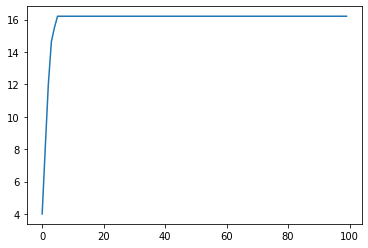

In [51]:
plt.plot(cs)

In [52]:
a.value_table.reshape(5,5)

array([[0.59049, 0.6561 , 0.729  , 0.81   , 0.729  ],
       [0.6561 , 0.59049, 1.     , 0.9    , 0.81   ],
       [0.729  , 1.     , 0.     , 1.     , 0.9    ],
       [0.81   , 0.9    , 1.     , 0.9    , 0.81   ],
       [0.729  , 0.81   , 0.9    , 0.81   , 0.729  ]])